In [1]:
from sklearn.datasets import make_regression

In [41]:
X, y = make_regression(n_samples=2000, n_features=30, n_informative=10, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)

(2000, 30)
(2000,)


In [43]:
y.mean()

3.6239580997379788

In [44]:
import matplotlib.pyplot as plt

In [54]:
import pandas as pd
import seaborn as sns

c:\users\berk_\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\users\berk_\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


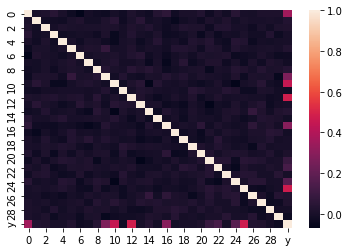

In [55]:
df = pd.DataFrame(X)
df['y'] = y

sns.heatmap(df.corr())

In [58]:
df.corr().head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,y
0,1.000000,0.003398,0.014844,0.040653,0.003736,-0.030116,-0.068980,-0.009995,-0.020736,-0.028767,...,-0.026284,0.011251,-0.014718,0.040500,0.000471,-0.005976,0.013629,0.011788,0.014517,0.357786
1,0.003398,1.000000,-0.015704,-0.016865,-0.018942,0.007860,0.021531,-0.010649,-0.010605,0.018028,...,0.012620,-0.005308,0.022773,-0.014434,0.007451,-0.000361,-0.002009,0.005700,0.001593,0.027547
2,0.014844,-0.015704,1.000000,-0.004661,0.016471,0.009584,0.002478,0.006501,0.007246,0.017844,...,-0.025357,0.024085,0.029386,-0.001027,-0.000620,-0.024635,0.010322,-0.018677,0.018156,0.020472
3,0.040653,-0.016865,-0.004661,1.000000,-0.022350,-0.012447,-0.003326,-0.007109,-0.024410,0.013939,...,0.008746,-0.035392,-0.008936,-0.013739,0.008452,-0.015007,-0.016738,0.027287,-0.028417,0.000103
4,0.003736,-0.018942,0.016471,-0.022350,1.000000,0.007698,-0.020197,0.008767,0.004048,-0.019598,...,0.033352,-0.016289,-0.028551,0.039381,0.026187,-0.033838,-0.010302,-0.012189,-0.005560,-0.001690


In [67]:
import numpy as np

np.corrcoef(df['y'], df['y']**2)

array([[1.        , 0.07590268],
       [0.07590268, 1.        ]])

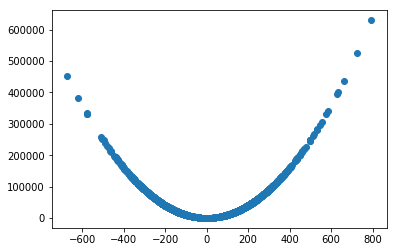

In [68]:
plt.scatter(df['y'], df['y']**2)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
model = DecisionTreeRegressor()

In [73]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [74]:
print('Train score:', model.score(X_train, y_train))

Train score: 1.0


In [75]:
print('Test score:', model.score(X_test, y_test))

Test score: 0.46420527529902034


**Overfit!**

In [76]:
model = DecisionTreeRegressor(max_depth=7)

In [77]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [78]:
print('Train score:', model.score(X_train, y_train))

Train score: 0.8261566368286887


In [79]:
print('Test score:', model.score(X_test, y_test))

Test score: 0.5328577320541432


**Still overfit**

In [80]:
model = DecisionTreeRegressor(max_depth=3)

In [81]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [82]:
print('Train score:', model.score(X_train, y_train))

Train score: 0.44971367541124263


In [83]:
print('Test score:', model.score(X_test, y_test))

Test score: 0.3468747276189652


**Both high bias and high variance**

In [84]:
depths = range(1,15)

for d in depths:
    print('Depth:', d)
    model = DecisionTreeRegressor(max_depth=d)
    model.fit(X_train, y_train)   
    print('Train score:', model.score(X_train, y_train))
    print('Test score:', model.score(X_test, y_test))
    print('\n')

Depth: 1
Train score: 0.16933637932899825
Test score: 0.11404050817326417


Depth: 2
Train score: 0.31445358242687504
Test score: 0.224300065041957


Depth: 3
Train score: 0.44971367541124263
Test score: 0.3468747276189652


Depth: 4
Train score: 0.5518780358746269
Test score: 0.4170030100914113


Depth: 5
Train score: 0.6496886453079092
Test score: 0.4613490481344027


Depth: 6
Train score: 0.7387601363785639
Test score: 0.48899199710659447


Depth: 7
Train score: 0.8261566368286887
Test score: 0.5235278836415149


Depth: 8
Train score: 0.8932642251918173
Test score: 0.5190372742564106


Depth: 9
Train score: 0.9417381264697499
Test score: 0.4694048301564908


Depth: 10
Train score: 0.9712633729150042
Test score: 0.47553435914301057


Depth: 11
Train score: 0.9871656704377567
Test score: 0.47152055200570786


Depth: 12
Train score: 0.9948353793261455
Test score: 0.47752167532761514


Depth: 13
Train score: 0.9980913465389192
Test score: 0.5250613563119829


Depth: 14
Train score: 0.99

In [89]:
min_samples_lef = range(1,20)

for d in min_samples_lef:
    print('Min samples leaf:', d)
    model = DecisionTreeRegressor(min_samples_leaf=d)
    model.fit(X_train, y_train)   
    print('Train score:', model.score(X_train, y_train))
    print('Test score:', model.score(X_test, y_test))
    print('\n')

Min samples leaf: 1
Train score: 1.0
Test score: 0.48517484237678093


Min samples leaf: 2
Train score: 0.9848679326548151
Test score: 0.4947534660702292


Min samples leaf: 3
Train score: 0.9653842223977686
Test score: 0.46446159600198356


Min samples leaf: 4
Train score: 0.938141801738765
Test score: 0.5171763375472984


Min samples leaf: 5
Train score: 0.9184111591872632
Test score: 0.5427730466593097


Min samples leaf: 6
Train score: 0.8965838523494796
Test score: 0.5558338417513449


Min samples leaf: 7
Train score: 0.8749301966733115
Test score: 0.5619290899294614


Min samples leaf: 8
Train score: 0.8610173595575751
Test score: 0.562048764113865


Min samples leaf: 9
Train score: 0.8452421826768551
Test score: 0.5559896181244037


Min samples leaf: 10
Train score: 0.8296168307721348
Test score: 0.55778049690081


Min samples leaf: 11
Train score: 0.810761415506678
Test score: 0.5755114873743921


Min samples leaf: 12
Train score: 0.8040096230095622
Test score: 0.56891660325321

In [88]:
max_nodes = range(60,80)

for d in max_nodes:
    print('Max leaf nodes:', d)
    model = DecisionTreeRegressor(max_leaf_nodes=d)
    model.fit(X_train, y_train)   
    print('Train score:', model.score(X_train, y_train))
    print('Test score:', model.score(X_test, y_test))
    print('\n')

Max leaf nodes: 60
Train score: 0.7605025673977143
Test score: 0.549377723079616


Max leaf nodes: 61
Train score: 0.7627988874186309
Test score: 0.5467356613430973


Max leaf nodes: 62
Train score: 0.7650352871185477
Test score: 0.5445861018073612


Max leaf nodes: 63
Train score: 0.767270719842701
Test score: 0.545772320394625


Max leaf nodes: 64
Train score: 0.7694804345249243
Test score: 0.5452868244322363


Max leaf nodes: 65
Train score: 0.7716096363097582
Test score: 0.545533001770266


Max leaf nodes: 66
Train score: 0.7737104673078787
Test score: 0.5450150201645599


Max leaf nodes: 67
Train score: 0.7757931681639492
Test score: 0.5465263092298537


Max leaf nodes: 68
Train score: 0.7779933136897089
Test score: 0.5470113250302902


Max leaf nodes: 69
Train score: 0.7800478316295386
Test score: 0.5463706880547963


Max leaf nodes: 70
Train score: 0.7820763215506116
Test score: 0.5519397464078337


Max leaf nodes: 71
Train score: 0.7840758654521678
Test score: 0.547448964596010

In [91]:
min_impurity = range(0, 20)

for d in min_impurity:
    print('Min impurity:', d)
    model = DecisionTreeRegressor(min_impurity_split=d)
    model.fit(X_train, y_train)   
    print('Train score:', model.score(X_train, y_train))
    print('Test score:', model.score(X_test, y_test))
    print('\n')

Min impurity: 0
Train score: 1.0
Test score: 0.4622989297046899


Min impurity: 1
Train score: 0.9999987531567136
Test score: 0.47071878285202173


Min impurity: 2
Train score: 0.9999965288336068
Test score: 0.4570100320786378


Min impurity: 3
Train score: 0.9999935233349024
Test score: 0.4700513900087093


Min impurity: 4
Train score: 0.9999910579295008
Test score: 0.502391686620156


Min impurity: 5
Train score: 0.9999884944554
Test score: 0.48184085607184657


Min impurity: 6
Train score: 0.9999850945461887
Test score: 0.511420331255277


Min impurity: 7
Train score: 0.9999811627309748
Test score: 0.4827362193764857


Min impurity: 8
Train score: 0.99997788760019
Test score: 0.4899796174300266


Min impurity: 9
Train score: 0.9999733786029829
Test score: 0.4777107072437781


Min impurity: 10
Train score: 0.9999695867193199
Test score: 0.5018659903218481


Min impurity: 11
Train score: 0.9999662931373882
Test score: 0.46205547213134457


Min impurity: 12
Train score: 0.9999627359204

## Feature Importances

In [92]:
model = DecisionTreeRegressor(max_leaf_nodes=70)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=70, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [94]:
importances = model.feature_importances_
importances

array([0.09785424, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07854333,
       0.20501428, 0.        , 0.280432  , 0.        , 0.        ,
       0.        , 0.08022603, 0.        , 0.        , 0.        ,
       0.        , 0.00320973, 0.00437508, 0.        , 0.01233064,
       0.23801467, 0.        , 0.        , 0.        , 0.        ])

In [128]:
filt = importances > 0.0

In [129]:
def select(data, filtre):
    return data.T[filtre].T

In [130]:
model = DecisionTreeRegressor(max_leaf_nodes=70)

In [131]:
model.fit(select(X_train, filt), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=70, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [132]:
model.score(select(X_train, filt), y_train)

0.7820763215506116

In [133]:
model.score(select(X_test, filt), y_test)

0.5519397464078337

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
l_model = LinearRegression()

In [136]:
l_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
l_model.score(X_train, y_train)

1.0

In [139]:
l_model.score(X_test, y_test)

1.0

In [141]:
l_model.coef_.round(3)

array([69.369,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,
       -0.   , 58.327, 92.85 , -0.   , 95.675,  0.   , 13.774,  0.   ,
       56.397, -0.   , -0.   ,  0.   , -0.   , 18.805, 20.182,  0.   ,
       37.776, 94.806,  0.   ,  0.   ,  0.   , -0.   ])

In [144]:
importances.round(3)

array([0.098, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.079, 0.205, 0.   , 0.28 , 0.   , 0.   , 0.   , 0.08 , 0.   ,
       0.   , 0.   , 0.   , 0.003, 0.004, 0.   , 0.012, 0.238, 0.   ,
       0.   , 0.   , 0.   ])

In [147]:
(l_model.coef_.round(3) > 0) == (importances.round(3) > 0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])